In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [28]:
df = pd.read_csv('survey_results_public.csv')
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

In [29]:
df.shape

(73268, 79)

<br><br>

#### Work preference

We can use the values from the remotework column to plot onto a bar chart to get a visual representation of the preferences.

In [30]:
df['RemoteWork'].value_counts()

Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: RemoteWork, dtype: int64

In [31]:
work_preferences = df['RemoteWork'].value_counts()

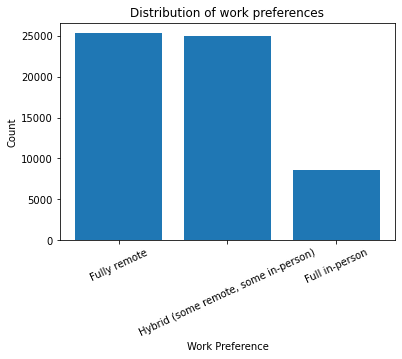

In [32]:
plt.bar(work_preferences.index, work_preferences.values)
plt.xlabel('Work Preference')
plt.ylabel('Count')
plt.title('Distribution of work preferences')
plt.xticks(rotation = 25)
plt.show()

<br><br>

#### Effect of experience on salary

In [33]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

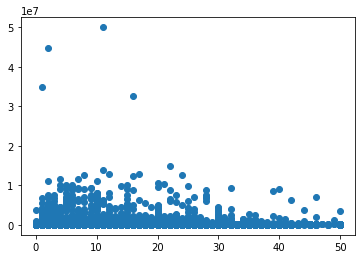

In [34]:
plt.scatter(df['WorkExp'], df['ConvertedCompYearly'])
plt.show()

In [35]:
df['Log_Salary'] = df['ConvertedCompYearly'].apply(lambda x: np.log10(x))

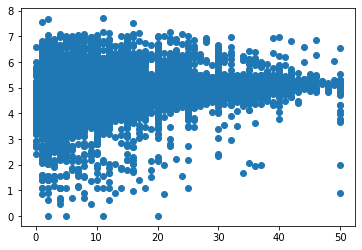

In [36]:
plt.scatter(df['WorkExp'], df['Log_Salary'])
plt.show()

<BR><BR>

#### Using linear regression

In [47]:
cleaned_df = df.dropna(axis = 0, subset = ['WorkExp', 'ConvertedCompYearly', 'Log_Salary'])

In [38]:
cleaned_df['WorkExp'].isnull().sum()

0

In [39]:
X = ['WorkExp']
Y = ['ConvertedCompYearly']

In [40]:
lr1 = LinearRegression()
lr1.fit(cleaned_df[X], cleaned_df[Y])
y_pred = lr1.predict(cleaned_df[X])

Model MSE: 587506888072.5348


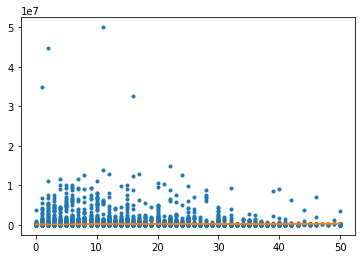

In [41]:
mse1 = np.mean((y_pred - cleaned_df[Y])**2)
print("Model MSE: {}".format(mse1[0]))
plt.plot(cleaned_df['WorkExp'], cleaned_df['ConvertedCompYearly'], '.', cleaned_df['WorkExp'], y_pred, '-')
plt.show()

In [42]:
X = ['WorkExp']
Y = ['ConvertedCompYearly']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_df[X], cleaned_df[Y], test_size=0.2, random_state=1)

Model Performance with polynomial 2
R-squared: 0.002438797702792095


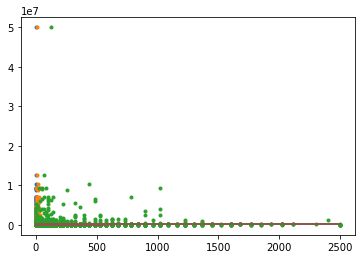

Model Performance with polynomial 3
R-squared: 0.002498873889295705


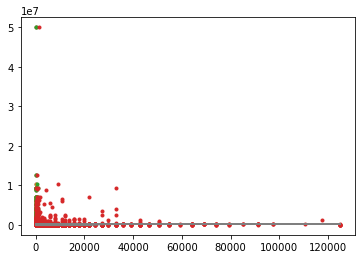

Model Performance with polynomial 4
R-squared: 0.0024380024308380266


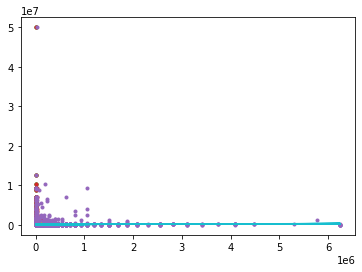

Model Performance with polynomial 5
R-squared: 0.0024275884179065788


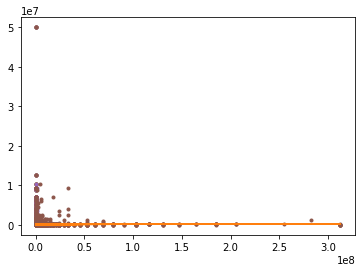

Model Performance with polynomial 6
R-squared: 0.002025208670086376


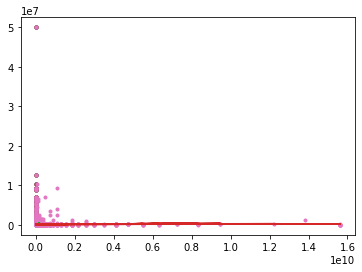

Model Performance with polynomial 7
R-squared: 0.002252339421967453


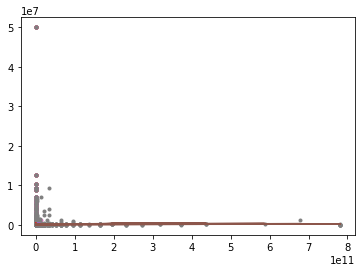

Model Performance with polynomial 8
R-squared: 0.002243671534214342


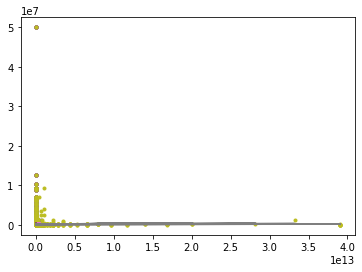

Model Performance with polynomial 9
R-squared: 0.0022261062901374196


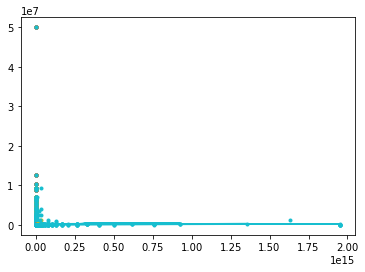

Model Performance with polynomial 10
R-squared: 0.0022716163880215356


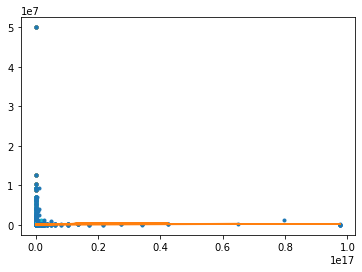

In [44]:
polynomials = (2, 3, 4, 5, 6, 7, 8, 9, 10)

for a in polynomials:
    poly = PolynomialFeatures(degree= a)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    print(f'Model Performance with polynomial {a}')
    print(f'R-squared: {model.score(X_test_poly, y_test)}')
    
    plt.plot(X_test_poly, y_test, '.', X_test_poly, y_pred, '-')
    plt.show()

Now we will scale the data before applying linear regression and look at the difference.

In [48]:
columns_to_scale = ['WorkExp', 'ConvertedCompYearly', 'Log_Salary']

In [52]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cleaned_df[columns_to_scale])

In [58]:
WorkExp = df_scaled[:, 0].reshape(-1, 1)
ConvertedCompYearly = df_scaled[:, 1].reshape(-1, 1)
Log_Salary = df_scaled[:, 2].reshape(-1, 1)

Mean Squared Error: 0.9973653769780414


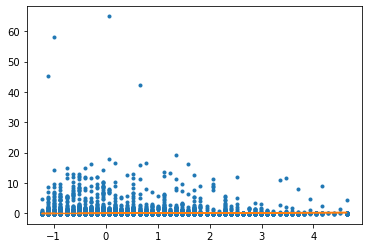

In [68]:
lr = LinearRegression()
lr.fit(WorkExp, ConvertedCompYearly)
y_pred = lr.predict(WorkExp)

mse = mean_squared_error(ConvertedCompYearly, y_pred)
print('Mean Squared Error:', mse)

plt.plot(WorkExp, ConvertedCompYearly, '.', WorkExp, y_pred, '-')
plt.show()

Mean Squared Error: 0.9076314287257522


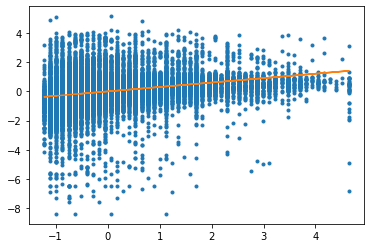

In [69]:
lr = LinearRegression()
lr.fit(WorkExp, Log_Salary)
y_pred = lr.predict(WorkExp)

mse = mean_squared_error(Log_Salary, y_pred)
print('Mean Squared Error:', mse)

plt.plot(WorkExp, Log_Salary, '.', WorkExp, y_pred, '-')
plt.show()

<br><br>

#### Popularity of methods of learning programming

In [ ]:
df.head(5)

In [ ]:
methods = ['books', 'bootcamp', 'colleague', 'friend_family', 'hackathon', 'course_certification', 'on_job', 'other_online', 'school']

count = [0, 0, 0, 0, 0, 0, 0, 0, 0]

learning = pd.Series(count, index = methods)

df['LearnCode'] = df['LearnCode'].astype(str)

for a in df['LearnCode']:
    if a != 'nan':
        if 'books' in a.lower():
            learning['books'] +=1
        if 'bootcamp' in a.lower():
            learning['bootcamp'] +=1
        if 'colleague' in a.lower():
            learning['colleague'] +=1
        if 'friend' in a.lower():
            learning['friend_family'] +=1
        if 'hackathon' in a.lower():
            learning['hackathon'] +=1
        if 'certification' in a.lower():
            learning['course_certification'] +=1
        if 'job' in a.lower():
            learning['on_job'] +=1
        if 'other online' in a.lower():
            learning['other_online'] +=1
        if 'school' in a.lower():
            learning['school'] +=1
            
print(learning)

In [ ]:
plt.bar(learning.index, learning.values)
plt.xlabel('Methods of Learning to code')
plt.ylabel('Count')
plt.title('Distribution of Learning methods')
plt.xticks(rotation = 50)
plt.show()